# Car Auction Data Analysis

This notebook contains different sections for analyzing the car auction dataset with suggested approaches and techniques.

## 02 Analysis

## 1. Price Distribution Analysis

Suggested analyses:
- Distribution of selling prices across different price ranges
- Price variations by make and model
- Price trends over time
- Price correlations with other features
- Outlier identification and analysis

## 2. Feature Impact Analysis

Explore how different features affect the selling price:
- Impact of mileage on price (regression analysis)
- Relationship between car condition and price
- Effect of transmission type on value
- Price variations by body type
- Color impact on resale value
- Interior type influence

## 3. Geographic Analysis

Study regional patterns:
- Price variations by state
- Popular models by region
- State-wise market preferences
- Regional price disparities
- Market size analysis by region

## 4. Time-Based Analysis with Google Trends

Investigate temporal patterns:
- Correlation between search trends and prices
- Seasonal price variations
- Model popularity trends
- Market timing analysis
- Search interest vs. actual sales

## 5. Market Segment Analysis

Group and analyze market segments:
- Luxury vs. Economy segments comparison
- Price ranges and their characteristics
- Popular features in different segments
- Segment-wise price elasticity
- Market share analysis

## 6. Depreciation Analysis

Study value retention:
- Depreciation rates by make/model
- Impact of mileage on depreciation
- Best value retention brands
- Condition impact on depreciation
- Age vs. value relationship

## 7. Statistical Testing

Perform statistical analysis:
- ANOVA for price differences between groups
- Chi-square tests for categorical relationships
- T-tests for specific comparisons
- Correlation significance tests
- Distribution normality tests

## 8. Market Efficiency Analysis

Study market dynamics:
- Price vs. MMR (Manheim Market Report) comparison
- Market over/under valuation patterns
- Pricing efficiency metrics
- Potential arbitrage opportunities
- Market adjustment speed

In [21]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set plotting style
# use seaborn's API to set the style (avoids matplotlib style name issues)
sns.set_style('darkgrid')
sns.set_palette("husl")

# Load the cleaned dataset
clean_car_df = pd.read_csv('../data/cleaned/car_prices_cleaned.csv')
raw_car_df = pd.read_csv('../data/raw/car_prices.csv')

/var/folders/25/myn29lpd1kgc8cf9vjv6822h0000gn/T/ipykernel_130/1637907259.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_avg = car_df.groupby(car_df['saledate'].dt.to_period('M'))['sellingprice'].mean().reset_index()


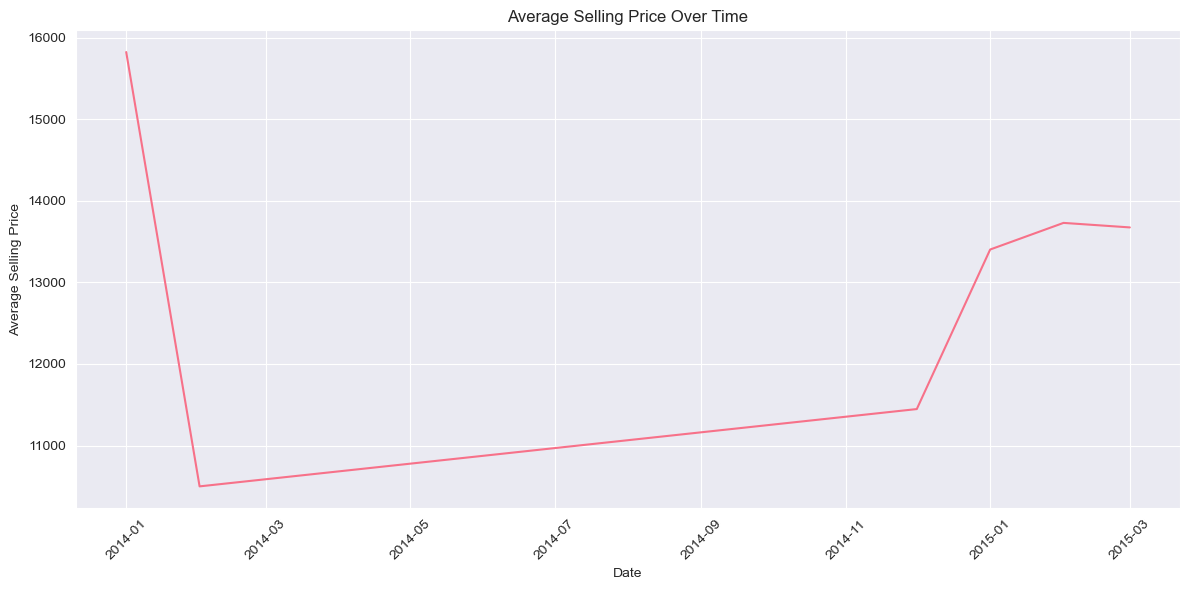

In [ ]:
# Average Selling Price Over Time
clean_car_df['saledate'] = pd.to_datetime(clean_car_df['saledate'], errors='coerce')
monthly_avg = clean_car_df.groupby(clean_car_df['saledate'].dt.to_period('M'))['sellingprice'].mean().reset_index()
monthly_avg['saledate'] = monthly_avg['saledate'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg, x='saledate', y='sellingprice')
plt.title('Average Selling Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- What was happening in early 2014 that car values dropped?

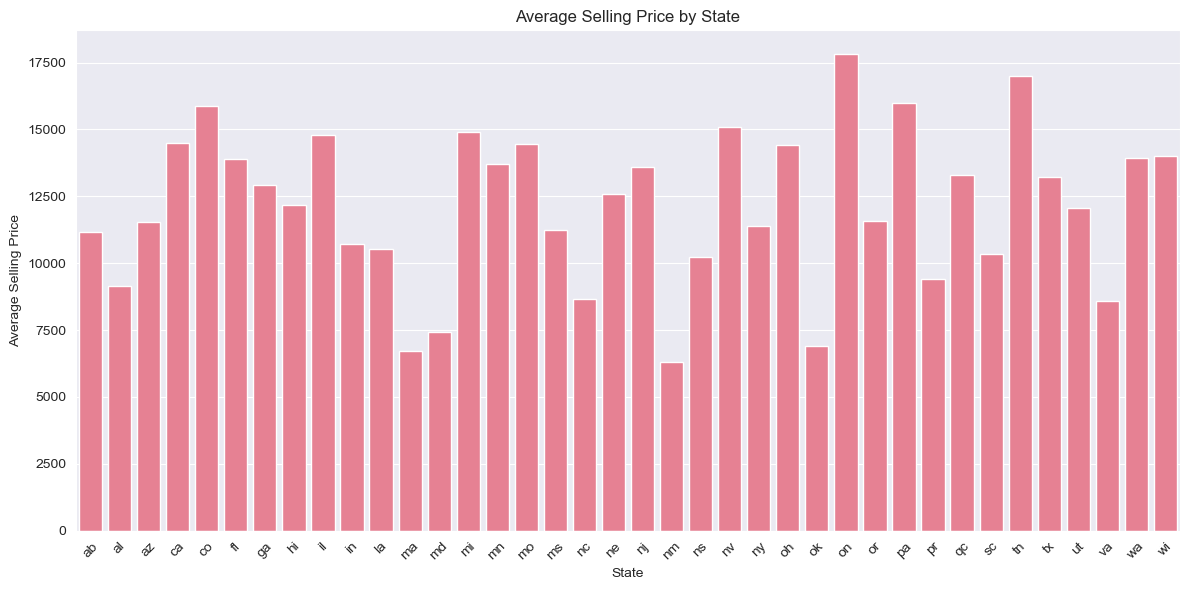

In [22]:
state_price_avg = raw_car_df.groupby('state')['sellingprice'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=state_price_avg, x='state', y='sellingprice')
plt.title('Average Selling Price by State')
plt.xlabel('State')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()